In [1]:
from engine import *
from diffusion import *

from matplotlib import pyplot as plt

A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'


In [2]:
skretch = gen_farm()

##skretch = add_skies(skretch, 4, Z = 200, )

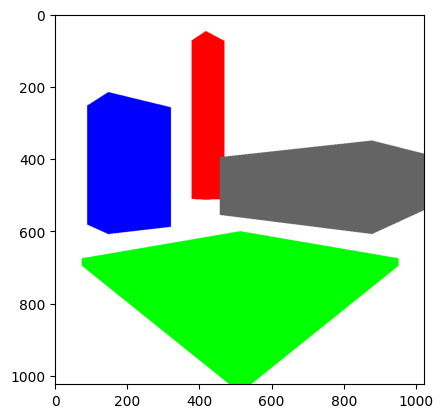

In [3]:
verbose = 0
linewidth = 0
pov = Point(0,0,12)
direction = Point(1,1,-0.1)
vision_angle = 35

sc1 = Scene(skretch, pov, direction, resolution = (1024,1024), vision_angle = 35, verbose = verbose, linewidth = linewidth)

seg_map = sc1.get_seg_map()
plt.imshow(seg_map)

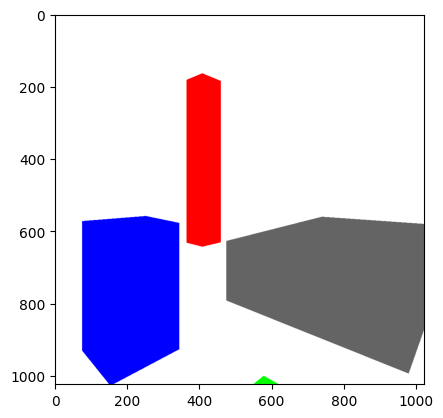

In [4]:
pov = Point(0,10,40)
direction = Point(1,0.9,-0.1)
sc2 = Scene(skretch, pov, direction, resolution = (1024,1024), vision_angle = 35, verbose = verbose, linewidth = linewidth)
seg_map = sc2.get_seg_map()
plt.imshow(seg_map)

In [5]:
prompt = "a countryside farm. Bright skies. Epic realistic, (hdr:1.4), (muted colors:1.4), abandoned, (intricate details), (intricate details, hyperdetailed:1.4), artstation, vignette"
device = "cuda"
model = "dreamshaper"
control = ["seg"]
steps = 100

stamped_img, src = run_diffusion(sc1 , device = device, prompt = prompt, model = model, control = control, steps = steps)

unet/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/home/yaniv/anaconda3/envs/pytorch/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/100 [00:00<?, ?it/s]

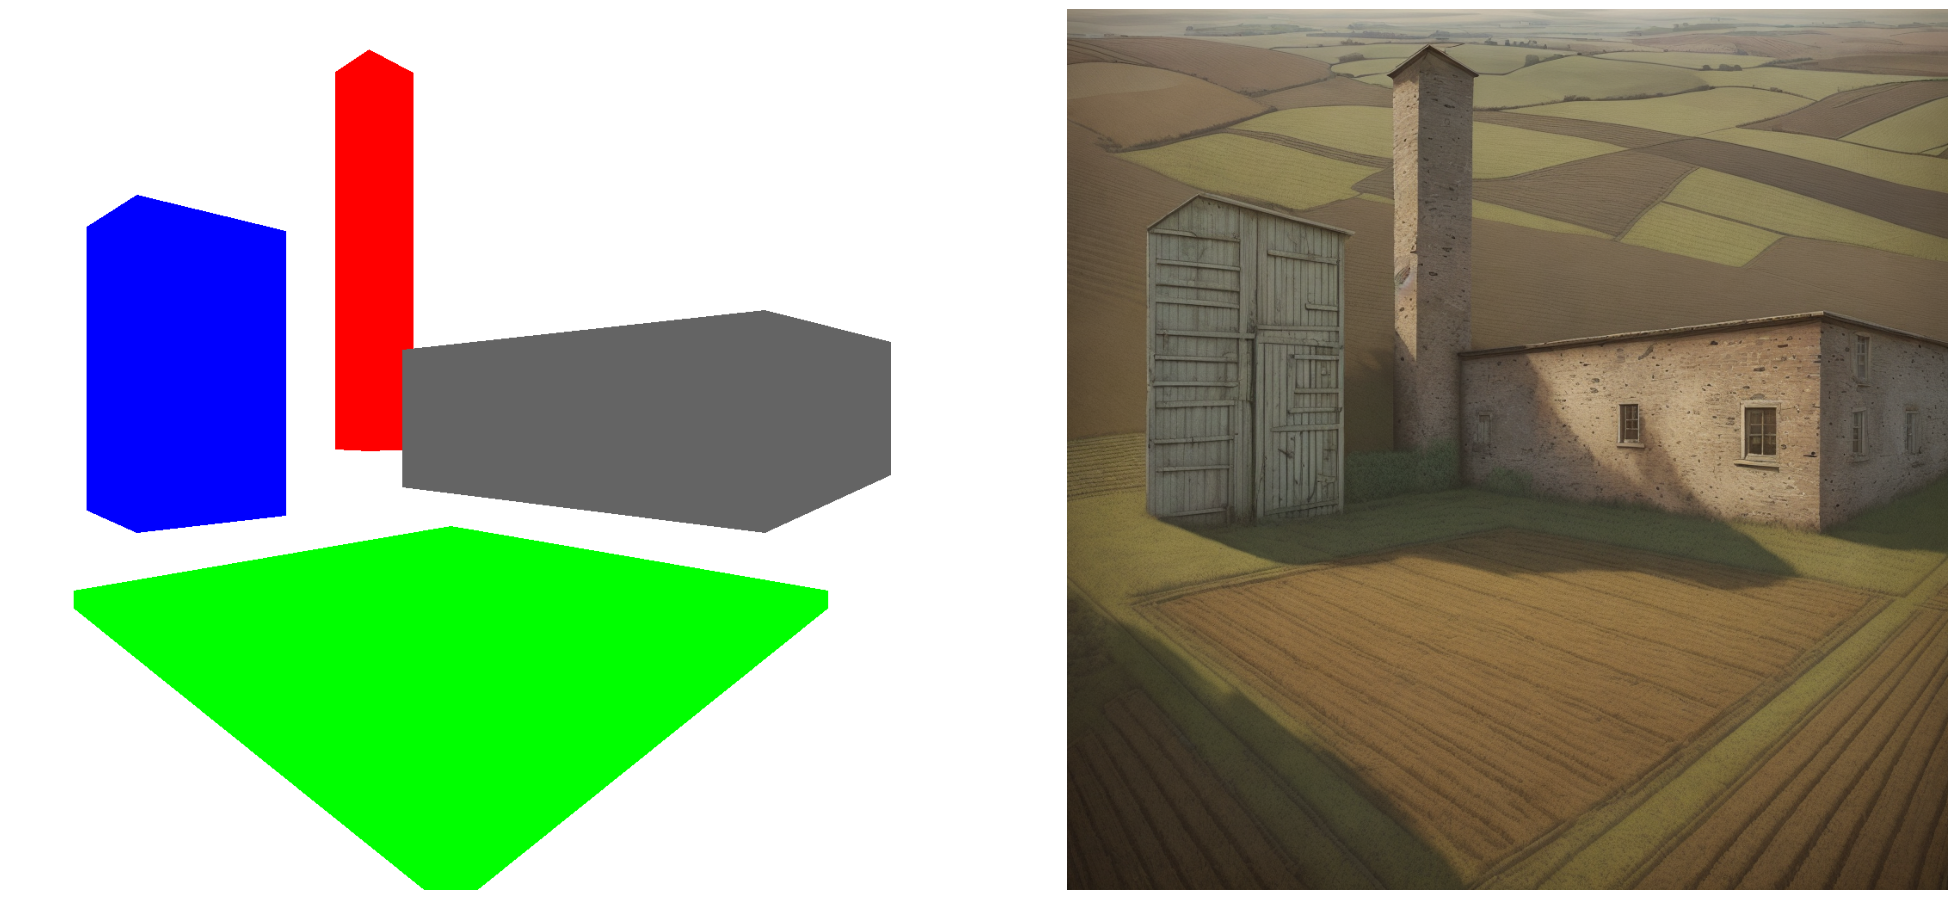

In [6]:
present([src], [stamped_img])

In [7]:
# sc1.stamp(stamped_img, verbose = False)
# unstamped_img = sc2.unstamp(verbose = False)

sc1.transition(sc2, intensity = 1.0)

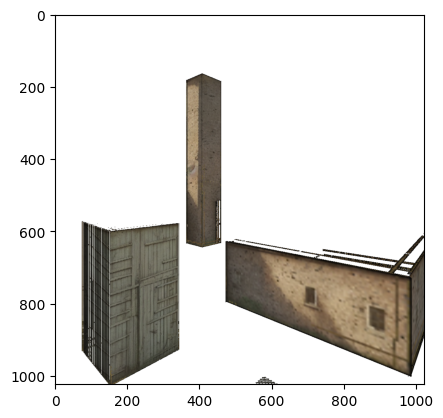

In [10]:
plt.imshow(sc2.get_image())

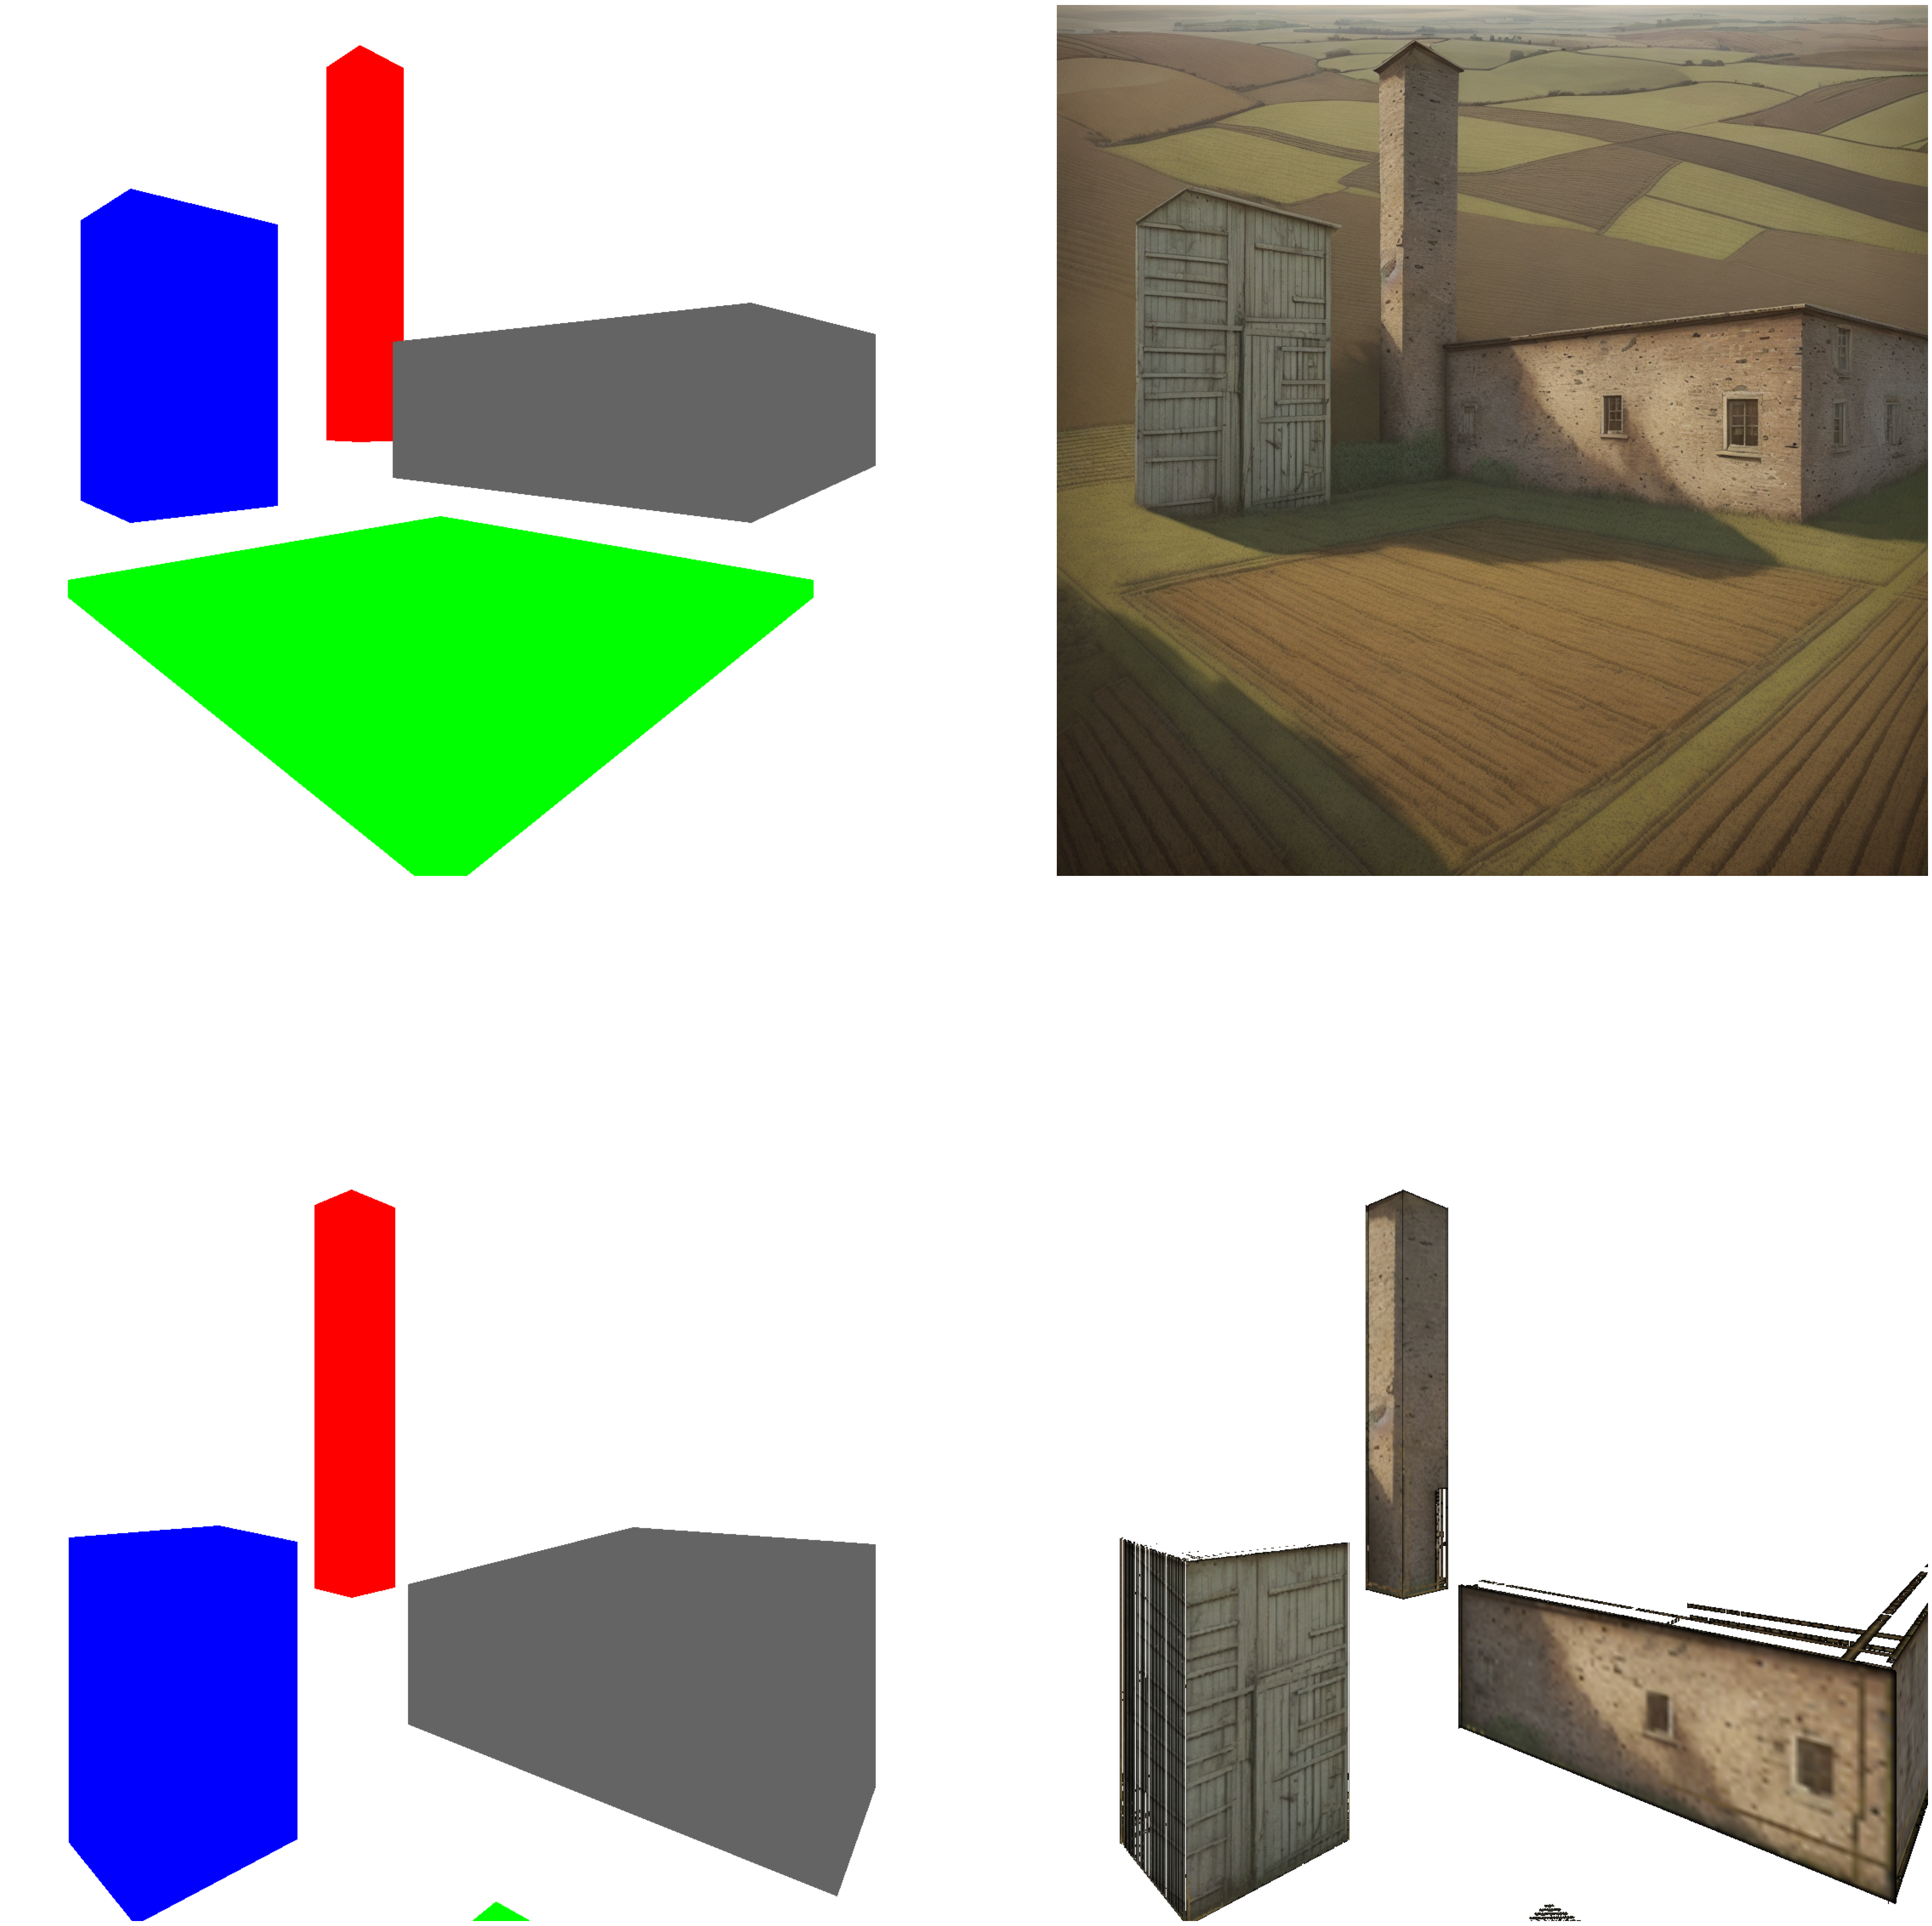

In [13]:
src = [[sc.get_seg_map()] for sc in [sc1,sc2]] 
results = [sc.get_image() for sc in [sc1,sc2]]

present(src, results)